# Language Identification

## Importing Libraries and Datasets

In [22]:
# Importing Libraries

# Libraries for EDA and Visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Libraries for ML Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Libraries for Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Libraries for Model Evaluation
from sklearn.metrics import accuracy_score, f1_score

# Pickling models
import pickle

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset

train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# Viewing the first 5 rows of the Train Dataset

train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
# Viewing the first 5 rows of the Test Dataset

test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
# Viewing the number Columns and Rows

train_df.shape

(33000, 2)

In [6]:
# Viewing number of Columns, Null Values and Data Types 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [7]:
# Viewing the total number of Null Values per Columns

train_df.isna().sum()

lang_id    0
text       0
dtype: int64

In [8]:
# Viewing the different types of languages

lang_types = train_df['lang_id'].unique().tolist()

print(f'There are {len(lang_types)} in total')
print(lang_types)

There are 11 in total
['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


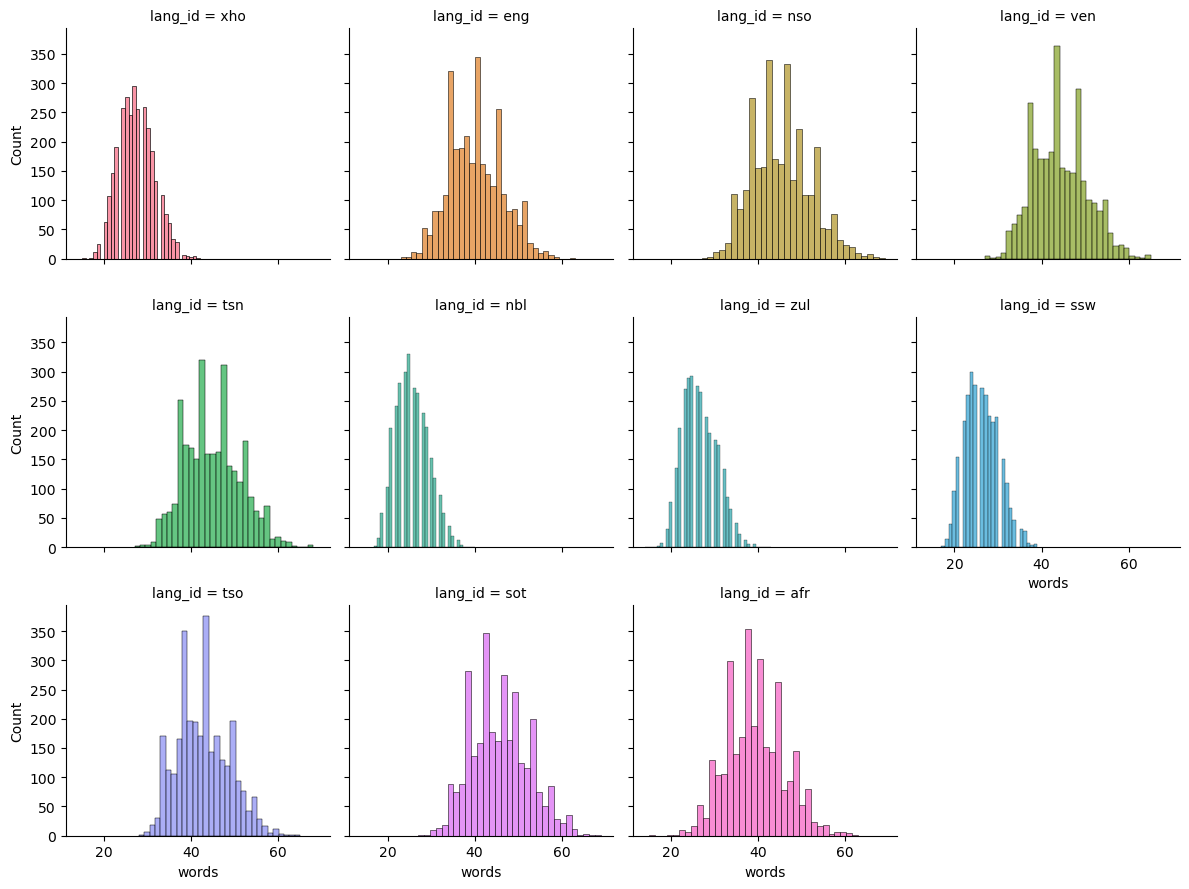

In [9]:
# Using a Histogram to view the distribution plots of each Language Type

text_hist = train_df.copy()
text_hist['words'] = text_hist['text'].apply(lambda text: len(text.split()))

fig = sns.FacetGrid(text_hist, col = 'lang_id', col_wrap = 4, hue = 'lang_id')
fig.map(sns.histplot, 'words')

## Data Processing & Data Engineering

In [10]:
# Creating a Function to clean the text data 

def Data_PreProcessing(data):
    list_of_text = []
    
    for text in data:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        
        text = re.sub(r'[[]]', ' ', text)
        
        text = text.lower()
        
        list_of_text.append(text)
        
    data = ''.join(list_of_text)
    
    return data

clean_train_df = train_df['text'].apply(lambda x: Data_PreProcessing(x))

In [11]:
# Using the Label Encoder to turn the Language ID from text to numerical figres that the model can identify

le = LabelEncoder()
le.fit(train_df['lang_id'])

train_df['lang_id'] = le.transform(train_df['lang_id'])

In [12]:
# Using the CountVectorizer to turn the text from text to numerical figres that the model can identify

cv = CountVectorizer()
cv.fit(clean_train_df)

X_cv = cv.transform(clean_train_df)

In [13]:
# Creating the X and Y Variables

X = X_cv
y = train_df['lang_id']

In [14]:
# Text Feature Extration

# Splitting the dataset into 80% Train set and 20% Test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modelling

In [15]:
# Initializing the Multinomial Naive Bayes Model and fitting it to the Train Set 

MN_Naive = MultinomialNB()
MN_Naive.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Model Generation Using Linear SVC Classifier

Linear_SVC = LinearSVC()
Linear_SVC.fit(X_train, y_train)

LinearSVC()

## Model Predcitions

In [17]:
# Using Multinomial Naive Bayes model to make predictions on the Test Set

y_pred_MN_Naive = MN_Naive.predict(X_test)

In [18]:
# Using Linear SVC model to make predictions on the Test Set

y_pred_Linear_SVC = Linear_SVC.predict(X_test)

## Model Evaluation

In [19]:
# Displaying the Accuracy Score and F1 Score of the Multinomial Naive Bayes model

ac_MN_Naive = accuracy_score(y_test, y_pred_MN_Naive)
f1_MN_Naive = f1_score(y_test, y_pred_MN_Naive, average='weighted')

print("Accuracy Score for the Multinomial Naive Bayes model: ", ac_MN_Naive)
print("F1 Score for the Multinomial Naive Bayes model: ", f1_MN_Naive)

Accuracy Score for the Multinomial Naive Bayes model:  0.9993939393939394
F1 Score for the Multinomial Naive Bayes model:  0.9993939278953948


In [20]:
# Displaying the Accuracy Score and F1 Score of the Linear SVC model

ac_Linear_SVC = accuracy_score(y_test, y_pred_Linear_SVC)
f1_Linear_SVC = f1_score(y_test, y_pred_Linear_SVC, average='weighted')

print("Accuracy Score for the Linear SVC model: ", ac_Linear_SVC)
print("F1 Score for the Linear SVC model: ", f1_Linear_SVC)

Accuracy Score for the Linear SVC model:  0.9962121212121212
F1 Score for the Linear SVC model:  0.9962149180406024


## Creating Models

In [23]:
# Creating a Multinomial Naive Bayes model pickle file

model_save_path = "Naive_Bayes.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(MN_Naive,file)

In [24]:
# Creating a Linear SVC model pickle file

model_save_path = "Linear_SVC.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(Linear_SVC,file)

## Submission to Kaggle

In [25]:
# Using the CountVectorizer to turn the text from text to numerical figres that the model can identify

Test_X_cv = cv.transform(test_df['text'])

In [26]:
# Using Multinomial Naive Bayes model to make predictions on the Test Dataset

Test_X_pred_MN_Naive = le.inverse_transform(MN_Naive.predict(Test_X_cv))
print(Test_X_pred_MN_Naive)

['tsn' 'nbl' 'ven' ... 'sot' 'sot' 'nbl']


In [27]:
# Saving the prediction results of the Multinomial Naive Bayes model for submission

MN_Naive_pred_df = pd.DataFrame(zip(test_df.index, Test_X_pred_MN_Naive), columns=['index', 'lang_id'])
MN_Naive_pred_df.to_csv('Naive_Bayes_Model.csv', index = False)

In [28]:
# Using Linear SVC model to make predictions on the Test Dataset

Test_X_pred_Linear_SVC = Linear_SVC.predict(Test_X_cv)
print(Test_X_pred_Linear_SVC)

[6 2 8 ... 4 4 5]


In [29]:
# Saving the prediction results of the Linear SVC model for submission

Linear_SVC_pred_df = pd.DataFrame(zip(test_df.index, Test_X_pred_Linear_SVC), columns = ['index', 'lang_id'])
Linear_SVC_pred_df.to_csv('SVM_Model.csv', index = False)